In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../datasets/household_power_consumption_v2.txt', sep=';', na_values=['nan','?'], usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
df.head(5)

,date,time,global_active_power,global_reactive_power,voltage,global_intensity,kitchen,laundry_room,thermal_utilities,day_of_week,day,month,year,time_formatted
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday,16,12,2006,17:24:00
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday,16,12,2006,17:25:00
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday,16,12,2006,17:26:00
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday,16,12,2006,17:27:00
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday,16,12,2006,17:28:00


In [3]:
# cols = ['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'kitchen', 'laundry_room', 'thermal_utilities']
# for col in cols:
#     df[col] = df[col].astype(float)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'kitchen', 'laundry_room', 'thermal_utilities']])

In [5]:
# for idx, row in df[['time', 'date', 'global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'kitchen', 'laundry_room', 'thermal_utilities']].iterrows():
#     if row['global_active_power'] == '?':
#         print(row['global_active_power'], ' ', row['date'], ' ', row['time'])
#         # break

In [6]:
df.loc[(df['global_active_power'].isna()) & (df['thermal_utilities'].isna())]

,date,time,global_active_power,global_reactive_power,voltage,global_intensity,kitchen,laundry_room,thermal_utilities,day_of_week,day,month,year,time_formatted
6839,2006-12-21,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,21,12,2006,11:23:00
6840,2006-12-21,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,21,12,2006,11:24:00
19724,2006-12-30,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,30,12,2006,10:08:00
19725,2006-12-30,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,30,12,2006,10:09:00
41832,2007-01-14,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,14,1,2007,18:36:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990185,2010-09-28,19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,28,9,2010,19:09:00
1990186,2010-09-28,19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,28,9,2010,19:10:00
1990187,2010-09-28,19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,28,9,2010,19:11:00
1990188,2010-09-28,19:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,28,9,2010,19:12:00


In [7]:
df.isna().sum()

date                         0
time                         0
global_active_power      25979
global_reactive_power    25979
voltage                  25979
global_intensity         25979
kitchen                  25979
laundry_room             25979
thermal_utilities        25979
day_of_week                  0
day                          0
month                        0
year                         0
time_formatted               0
dtype: int64

In [8]:
import plotly.express as px
# fig = px.line(df2, x='time', y=["mov_avg", 'global_active_power'])
fig = px.line(df[df['date'] == '2007-01-14'], x='time', y=["global_active_power"])
fig.show()

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

C:\Users\sclab\AppData\Local\Temp\ipykernel_11308\4098886997.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



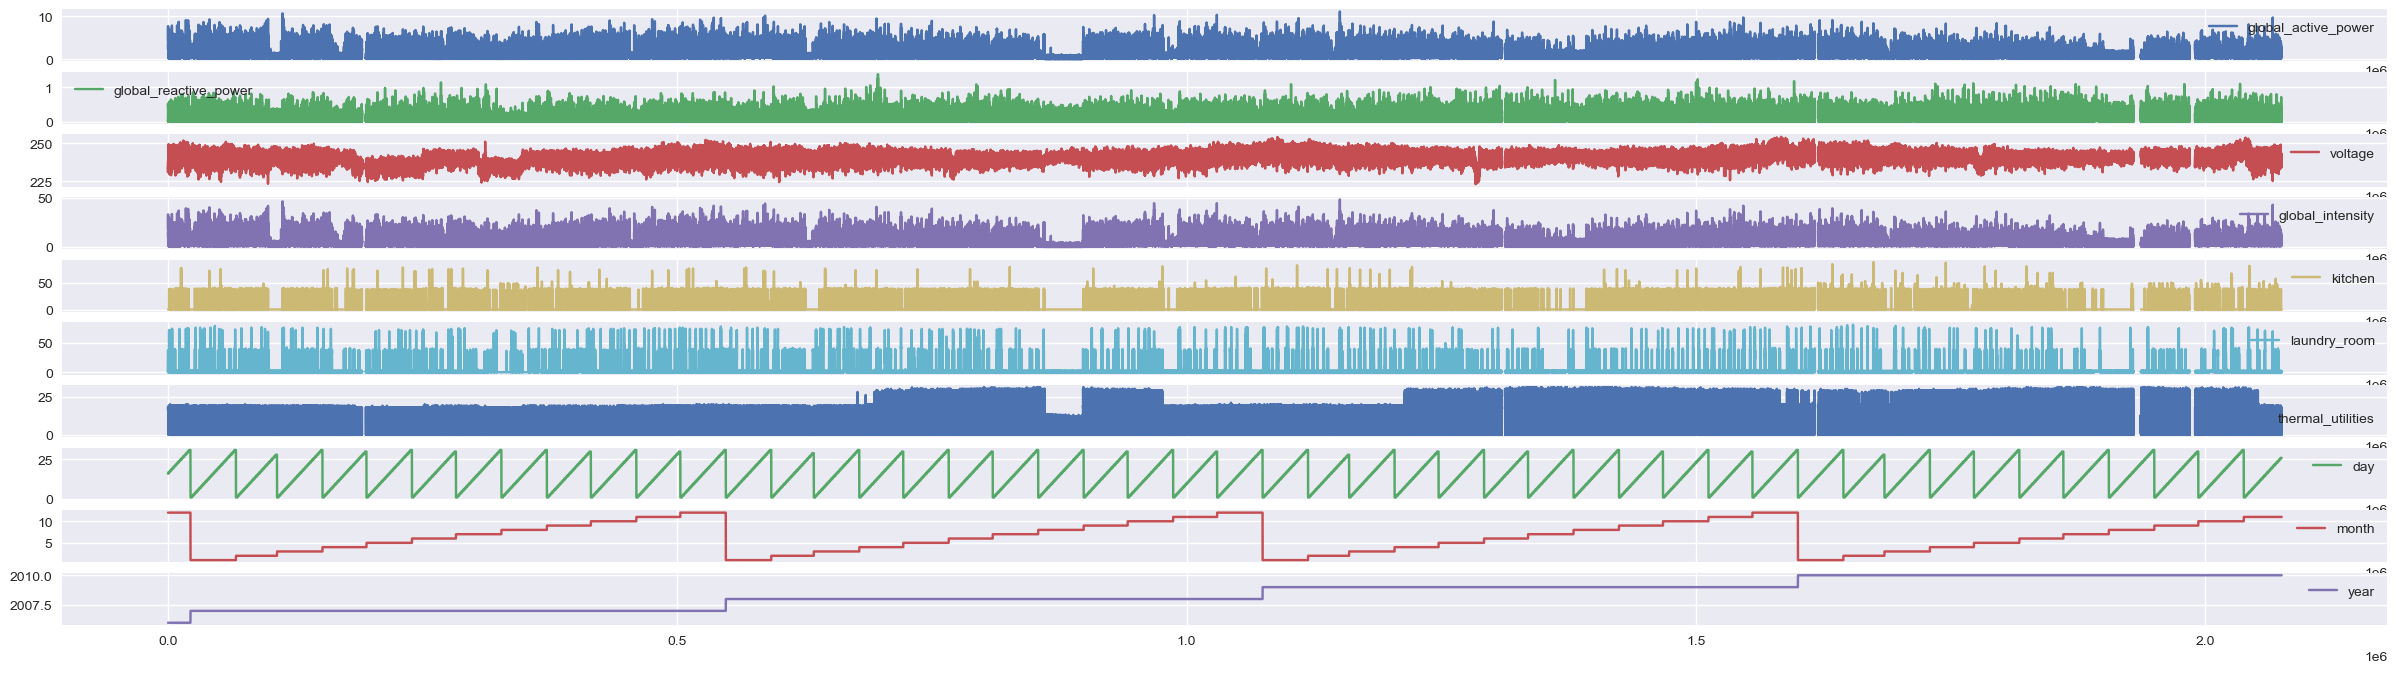

In [10]:
df.plot(subplots=True, figsize=(30,8))
plt.show()

### Imputation

In [16]:
def impute_nan_values(df):
    
    """
    Function to impute values
    
    Input : Dataframe with missing values
    Output : Dataframe with imputed values
    """
    
    data = []
    for d in list(df.groupby(df.year)):
        
        data.append(d[1].fillna(d[1].mean()))
        
    return pd.DataFrame(np.vstack(data), index=df.index, columns=df.columns)

In [39]:
df = pd.read_csv('../datasets/household_power_consumption_v2.txt', parse_dates={'datetime' : ['date','time']}, infer_datetime_format=True, index_col='datetime', sep=';', na_values=['nan','?'], usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
df.head(5)

C:\Users\sclab\AppData\Local\Temp\ipykernel_11308\3380356991.py:1: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



,global_active_power,global_reactive_power,voltage,global_intensity,kitchen,laundry_room,thermal_utilities,day_of_week,day,month,year,time_formatted
datetime,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday,16,12,2006,17:24:00
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday,16,12,2006,17:25:00
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday,16,12,2006,17:26:00
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday,16,12,2006,17:27:00
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday,16,12,2006,17:28:00


In [45]:
# ["date", "time", "global_active_power", "global_reactive_power", "voltage", "global_intensity", "kitchen", "laundry_room", "thermal_utilities", "day", "month", "year"]
df2 = df[["global_active_power", "global_reactive_power", "voltage", "global_intensity", "kitchen", "laundry_room", "thermal_utilities"]]
data = []
for d in df2[["global_active_power", "global_reactive_power", "voltage", "global_intensity", "kitchen", "laundry_room", "thermal_utilities"]].groupby(df2.index.year):
    data.append(d[1].fillna(d[1].mean()))
df_imputed = pd.DataFrame(np.vstack(data), index=df2.index, columns=df2.columns)

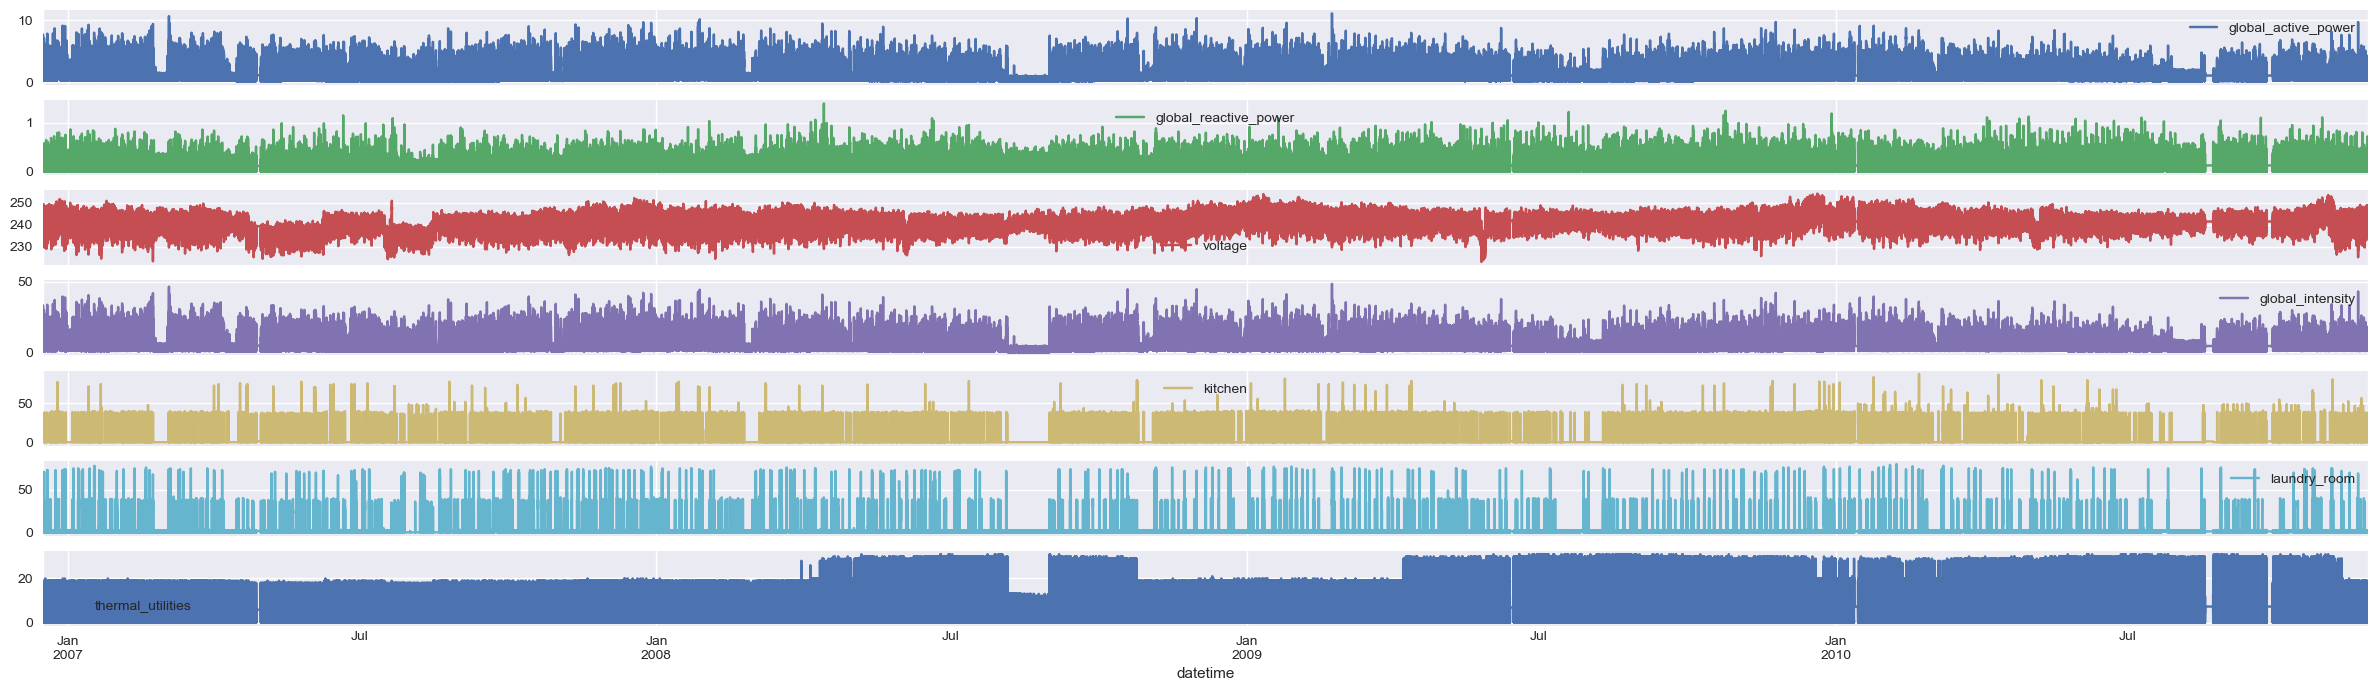

In [46]:
df_imputed.plot(subplots=True, figsize=(30,8))
plt.show()

In [54]:
df_imputed.isna().sum()

global_active_power      0
global_reactive_power    0
voltage                  0
global_intensity         0
kitchen                  0
laundry_room             0
thermal_utilities        0
dtype: int64

In [76]:
df_original = pd.read_csv('../datasets/household_power_consumption_v2.txt', sep=';', na_values=['nan','?'], usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
df_original.head(5)

,date,time,global_active_power,global_reactive_power,voltage,global_intensity,kitchen,laundry_room,thermal_utilities,day_of_week,day,month,year,time_formatted
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday,16,12,2006,17:24:00
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday,16,12,2006,17:25:00
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday,16,12,2006,17:26:00
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday,16,12,2006,17:27:00
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday,16,12,2006,17:28:00


In [77]:
df_imputed = df_imputed.reset_index()
for col in ['date', 'time_formatted', 'day', 'month', 'year']:
    df_imputed[col] = df_original[col]

In [79]:
df_imputed.head(5)

,datetime,global_active_power,global_reactive_power,voltage,global_intensity,kitchen,laundry_room,thermal_utilities,date,time_formatted,day,month,year
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16,17:24:00,16,12,2006
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16,17:25:00,16,12,2006
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16,17:26:00,16,12,2006
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16,17:27:00,16,12,2006
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16,17:28:00,16,12,2006


In [86]:
import plotly.express as px
# fig = px.line(df2, x='time', y=["mov_avg", 'global_active_power'])
fig = px.line(df_imputed[df_imputed['date'] == '2007-01-14'], x='time_formatted', y=["global_active_power", 'global_intensity', 'kitchen', 'laundry_room', 'thermal_utilities'])
fig.show()

In [88]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   global_active_power    float64       
 2   global_reactive_power  float64       
 3   voltage                float64       
 4   global_intensity       float64       
 5   kitchen                float64       
 6   laundry_room           float64       
 7   thermal_utilities      float64       
 8   date                   object        
 9   time_formatted         object        
 10  day                    int64         
 11  month                  int64         
 12  year                   int64         
dtypes: datetime64[ns](1), float64(7), int64(3), object(2)
memory usage: 205.8+ MB


In [89]:
df_imputed.describe()

,datetime,global_active_power,global_reactive_power,voltage,global_intensity,kitchen,laundry_room,thermal_utilities,day,month,year
count,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,2008-12-06 07:12:59.999994112,1.091377e+00,1.237664e-01,2.408450e+02,4.626601e+00,1.121020e+00,1.297154e+00,6.464589e+00,1.577363e+01,6.450359e+00,2.008437e+03
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.006000e+03
25%,2007-12-12 00:18:30,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,3.000000e+00,2.007000e+03
50%,2008-12-06 07:13:00,6.300000e-01,1.020000e-01,2.410400e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.600000e+01,6.000000e+00,2.008000e+03
75%,2009-12-01 14:07:30,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2.300000e+01,9.000000e+00,2.009000e+03
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,3.100000e+01,1.200000e+01,2.010000e+03
std,NaN,1.050661e+00,1.120163e-01,3.221221e+00,4.416519e+00,6.114411e+00,5.785522e+00,8.384555e+00,8.787773e+00,3.415762e+00,1.128677e+00


In [93]:
df_original.describe()

,global_active_power,global_reactive_power,voltage,global_intensity,kitchen,laundry_room,thermal_utilities,day,month,year
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,1.577363e+01,6.450359e+00,2.008437e+03
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,8.787773e+00,3.415762e+00,1.128677e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.006000e+03
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,3.000000e+00,2.007000e+03
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.600000e+01,6.000000e+00,2.008000e+03
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2.300000e+01,9.000000e+00,2.009000e+03
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,3.100000e+01,1.200000e+01,2.010000e+03


### Drop NA based on paper

In [105]:
print(df_original.isna().sum())
print(df_original.shape)
df_original.shape[0] - 25979

date                         0
time                         0
global_active_power      25979
global_reactive_power    25979
voltage                  25979
global_intensity         25979
kitchen                  25979
laundry_room             25979
thermal_utilities        25979
day_of_week                  0
day                          0
month                        0
year                         0
time_formatted               0
dtype: int64
(2075259, 14)


2049280

In [106]:
df_drop = df_original.dropna()

In [111]:
print(df_drop.isna().sum())
print(df_drop.shape)

date                     0
time                     0
global_active_power      0
global_reactive_power    0
voltage                  0
global_intensity         0
kitchen                  0
laundry_room             0
thermal_utilities        0
day_of_week              0
day                      0
month                    0
year                     0
time_formatted           0
dtype: int64
(2049280, 14)


In [118]:
df_drop.describe()

,global_active_power,global_reactive_power,voltage,global_intensity,kitchen,laundry_room,thermal_utilities,day,month,year
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,1.571245e+01,6.454433e+00,2.008425e+03
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,8.801670e+00,3.423209e+00,1.124388e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.006000e+03
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,3.000000e+00,2.007000e+03
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.600000e+01,6.000000e+00,2.008000e+03
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2.300000e+01,9.000000e+00,2.009000e+03
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,3.100000e+01,1.200000e+01,2.010000e+03


### save to csv

In [119]:
df_imputed.to_csv('../datasets/household_power_consumption_v3_imputed.txt', sep=';')
df_drop.to_csv('../datasets/household_power_consumption_v3_drop.txt', sep=';')

: 